# Kelompok 7
## Data Airbnb Analyzing
1. Ni Putu Eka Martini (2208541006)
2. Leonardo Edbert Theodora (2208541031)
3. Ni Made Galuh Puspamurti (2208541032)
4. Adina Nur Halimah Sanwani (2208541033)

# 

## Import Library

Import library dimaksudkan untuk memanggil modul dari fungsi-fungsi yang diperlukan nantinya dalam analisis data.

In [1]:
import pandas as pd # untuk Data Frame
import numpy as np # untuk operasi pada data

from matplotlib import pyplot as plt # untuk Visualisasi Grafik
import seaborn as sns # untuk visualisasi grafik

import plotly.express as px # untuk visualisasi grafik
import cufflinks as cf # untuk mengonfigurasi mode offline dalam pembuatan grafik interaktif menggunakan Plotly dengan pandas.
cf.set_config_file(offline=True)
import folium # untuk membuat peta interaktif menggunakan Leaflet.js.

import warnings # untuk mengontrol peringatan yang dihasilkan program
warnings.filterwarnings (action="ignore")

# 

## 1. Exploratory Data 

Exploratory data analysis (EDA) bertujuan untuk memahami dan menganalisis karakteristik data yang tersedia sebelum menjalankan analisis statistik formal atau membangun model prediktif. 

Dataset yang digunakan adalah data airbnb. Sebelumnya, Airbnb merupakan platform yang menyediakan layanan bagi pemilik properti untuk menyewakan rumah atau kamar mereka kepada para penyewa/traveller untuk jangka waktu tertentu. Data Airbnb dapat memberikan wawasan tentang kawasan atau wilayah yang populer sebagai tujuan wisata atau tempat tinggal sementara.


#### a.) Membaca Dataset

In [2]:
data_airbnb = pd.read_csv('airbnb.csv')
data_airbnb

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,Vienna,301.054157,Weekend,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


Pada Dataset Airbnb yang diketahui, terdapat penilaian pada masing-masing penginapan sesuai dengan kriteria yang diketahui.  Sehingga, para pemilik penginapan memerlukan analisis pada masing-masing fitur yang dimiliki untuk mengetahui penilaian pada tempat penginapan.

# Pertanyaan: Bisakah seorang pemilik penginapan airbnb memprediksi penilaian penyewa berdasarkan fitur-fitur airbnb yang dimilikinya.

# 

In [3]:
# Fungsi 'describe()' digunakan untuk memberikan ringkasan statistik deskriptif dari data numerik. 

data_airbnb.describe()

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,3.237235,0.295273,0.341180,9.442274,93.103179,1.165939,2.679792,0.603921,293.905990,11.719658,626.692618,25.553590
std,279.408493,1.299459,0.456171,0.474112,0.889173,8.141745,0.638157,1.996684,0.706206,235.750055,8.379161,520.644720,18.484572
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757
25%,144.016085,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.275913,0.236693,124.371614,5.510735,210.459574,11.132052
50%,203.819274,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.253237,0.391220,228.920599,9.951086,519.583509,21.814414
75%,297.373358,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,3.584489,0.678702,394.000201,15.467009,860.708156,36.821356
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


In [4]:
# Fungsi 'shape' digunakan untuk mengembalikan tuple yang menunjukkan dimensi dari suatu DataFrame. 

data_airbnb.shape

(41714, 19)

In [5]:
# Fungsi 'columns' digunakan untuk mengambil daftar kolom yang ada dalam DataFrame.

data_airbnb.columns

Index(['City', 'Price', 'Day', 'Room Type', 'Shared Room', 'Private Room',
       'Person Capacity', 'Superhost', 'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
       'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index'],
      dtype='object')

In [6]:
# Fungsi 'dtypes' digunakan untuk mengambil tipe data dari setiap kolom dalam DataFrame.

data_airbnb.dtypes

City                            object
Price                          float64
Day                             object
Room Type                       object
Shared Room                       bool
Private Room                      bool
Person Capacity                float64
Superhost                         bool
Multiple Rooms                   int64
Business                         int64
Cleanliness Rating             float64
Guest Satisfaction             float64
Bedrooms                         int64
City Center (km)               float64
Metro Distance (km)            float64
Attraction Index               float64
Normalised Attraction Index    float64
Restraunt Index                float64
Normalised Restraunt Index     float64
dtype: object

Dapat dilihat, masih terdapat data string pada dataframe. Data string ini nantinya akan dirubah menjadi data numerik agar mempermudah analisis.

# 

<AxesSubplot:>

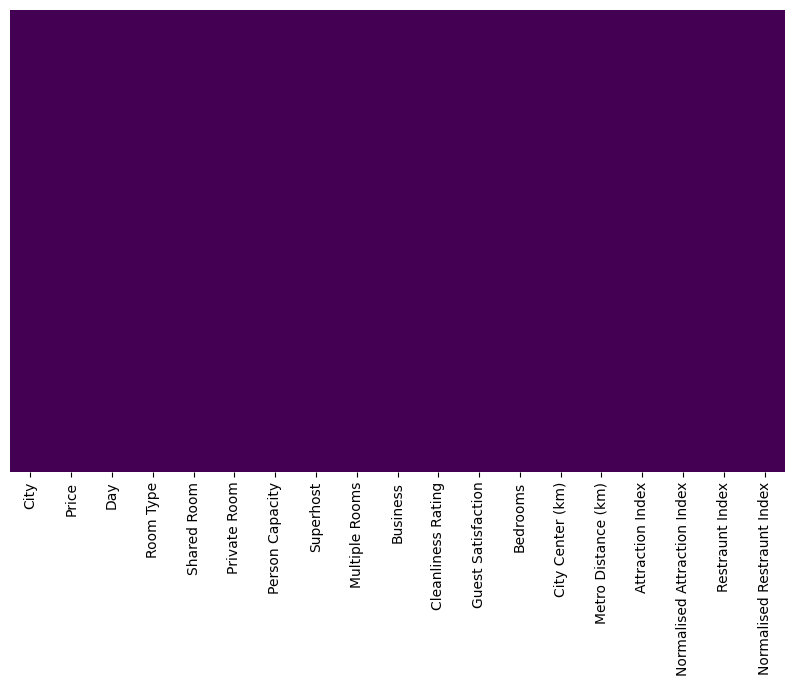

In [7]:
# Fungsi 'sns.heatmap(data_airbnb.isnull())' digunakan untuk membuat heatmap yang menggambarkan pola data yang hilang
# (missing values) dalam DataFrame. 

plt.figure (figsize=(10,6))
sns.heatmap(data_airbnb.isnull(), yticklabels = False, cmap = 'viridis' , cbar = False)

Dapat dilihat, tidak terdapat data yang kosong. 

# 

#### b.) Korelasi Antar Dataset 

In [8]:
data_airbnb.corr().style.background_gradient().set_precision(2)

,Price,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
Price,1.00,-0.04,-0.15,0.18,-0.04,-0.06,0.01,0.00,0.02,0.21,-0.05,-0.04,0.17,0.27,0.11,0.22
Shared Room,-0.04,1.00,-0.06,0.04,-0.03,-0.02,0.06,-0.05,-0.04,-0.02,0.02,-0.02,-0.03,0.00,-0.03,0.00
Private Room,-0.15,-0.06,1.00,-0.48,-0.06,0.15,-0.02,-0.03,-0.05,-0.14,0.13,0.03,0.00,-0.00,0.01,-0.07
Person Capacity,0.18,0.04,-0.48,1.00,0.04,-0.06,0.10,0.01,0.02,0.56,-0.08,0.01,0.01,-0.05,0.02,-0.01
Superhost,-0.04,-0.03,-0.06,0.04,1.00,0.09,-0.09,0.28,0.29,0.02,-0.02,0.01,-0.02,-0.06,-0.03,-0.06
Multiple Rooms,-0.06,-0.02,0.15,-0.06,0.09,1.00,-0.47,0.03,0.04,-0.01,0.03,0.04,0.02,-0.02,0.02,-0.04
Business,0.01,0.06,-0.02,0.10,-0.09,-0.47,1.00,-0.08,-0.18,-0.02,-0.18,-0.07,0.09,0.02,0.11,0.09
Cleanliness Rating,0.00,-0.05,-0.03,0.01,0.28,0.03,-0.08,1.00,0.69,0.03,0.00,0.02,-0.02,-0.04,-0.03,-0.05
Guest Satisfaction,0.02,-0.04,-0.05,0.02,0.29,0.04,-0.18,0.69,1.00,0.04,0.03,0.03,-0.05,-0.02,-0.07,-0.05
Bedrooms,0.21,-0.02,-0.14,0.56,0.02,-0.01,-0.02,0.03,0.04,1.00,0.00,0.05,-0.02,-0.08,-0.02,-0.08


Dapat dilihat, korelasi pada masing-masing dapat memiliki rentang -1 sampai +1.
Nilai yang mendekati -1 atau +1 menunjukkan hubungan yang kuat diantara dua variabel tersebut. Sementara nilai yang mendekati 0 menunjukkan hubungan yang lemah. 

In [9]:
data_airbnb_price_Attraction = data_airbnb.groupby(['Cleanliness Rating'])['Guest Satisfaction'].mean().reset_index().sort_values(by='Guest Satisfaction', ascending=True)[:]
data_airbnb_price_Attraction = data_airbnb_price_Attraction.round(decimals = 2)
data_airbnb_price_Attraction

,Cleanliness Rating,Guest Satisfaction
0,2.0,30.68
1,3.0,43.67
2,4.0,53.49
3,5.0,63.96
4,6.0,70.85
5,7.0,78.55
6,8.0,84.63
7,9.0,91.02
8,10.0,96.26


In [10]:
fig = px.scatter(data_frame = data_airbnb_price_Attraction,
                y = 'Guest Satisfaction',
                x='Cleanliness Rating',
                color = 'Guest Satisfaction',
                size = 'Guest Satisfaction')
fig.update_layout(template = 'plotly_dark', title_text = 'Hubungan Cleanliness dengan Guest Satisfaction')

In [11]:
fig = px.scatter(data_frame = data_airbnb,
                y = 'Guest Satisfaction',
                x='Superhost',
                color = 'Guest Satisfaction',
                size = 'Guest Satisfaction')
fig.update_layout(template = 'plotly_dark', title_text = 'Hubungan Superhost dengan Guest Satisfaction')

### Kesimpulan : 

####  
1. Berdasarkan tabel korelasi, dapat dilihat bahwa 'Superhost' dan 'Cleanliness Rating' memiliki korelasi yang cukup tinggi terhadap 'Guest Satisfaction' , yaitu 29% dan 69%. Sehingga, kedua variabel tersebut lebih mempengaruhi variabel 'Guest Satisfaction' dibandingkan variabel lain.

2. Berdasarkan scatter plot 'Cleanliness Rating' dan 'Guest Satisfaction', dapat dilihat bahwa jika score 'Cleanliness Rating' relatif rendah maka score 'Guest Satisfaction' relatif rendah. Lalu, jika score 'Cleanliness Rating' relatif tinggi maka score 'Guest Satisfaction' relatif tinggi.

3. Berdasarkan scatter plot 'Superhost' dan 'Guest Satisfaction', dapat dilihat bahwa jika terdapat 'Superhost' pada penginapan maka score 'Guest Satisfaction' relatif diatas 70%. Lalu, jika tidak terdapat 'Superhost' pada penginapan maka score 'Guest Satisfaction' relatif beragam, yakni berada pada interval 20-100%.



# 

## 2. Feuture Engineering 

Pada Feuture Engineering akan dilakukan manipulasi transformari variabel yang terdapat dalam dataset untuk meningkatkan kualitas model prediktif. Diantaranya akan dilakukan peningkatan model data, mengurangi dimensi data, dan menyesuaikan data.

#### a.) Mapping Data Object 

Mapping data digunakan untuk meningkatkan model data. Data object dan boolean akan dirubah menjadi data numerik yang posisinya berdasarkan urutan data.

In [12]:
# Fungsi 'unique()'' digunakan untuk mengambil nilai unik dari dalam DataFrame. 

data_airbnb.Day.unique()       

array(['Weekday', 'Weekend'], dtype=object)

In [13]:
# Fungsi 'map()' digunakan untuk memetakan atau menghubungkan suatu nilai atau kategori ke nilai atau kategori lainnya.

data_airbnb['Day'] = \
data_airbnb['Day'].map({'Weekday':0,'Weekend':1})

In [14]:
data_airbnb['Room Type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [15]:
data_airbnb['Room Type'] = \
data_airbnb['Room Type'].map({'Entire home/apt':3,'Private room':2,'Shared room':1})

In [16]:
data_airbnb['Shared Room'].unique()

array([False,  True])

In [17]:
data_airbnb['Private Room'].unique()

array([ True, False])

In [18]:
data_airbnb['Superhost'].unique()

array([False,  True])

In [19]:
data_airbnb['Shared Room'] = \
data_airbnb['Shared Room'].map({True:1,False:0})

data_airbnb['Private Room'] = \
data_airbnb['Private Room'].map({True:1,False:0})

data_airbnb['Superhost'] = \
data_airbnb['Superhost'].map({True:1,False:0})

data_airbnb

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,0,2,0,1,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,0,2,0,1,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,0,2,0,1,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,0,2,0,1,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,0,2,0,1,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,1,3,0,0,6.0,0,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,Vienna,304.793960,1,3,0,0,2.0,0,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,Vienna,637.168969,1,3,0,0,2.0,0,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,Vienna,301.054157,1,2,0,1,2.0,0,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


Berikut adalah kolom-kolom hasil mapping data object.

# 

#### b.) One Hot Encoding Data 

One hot encoding digunakan untuk mengubah variabel kategorikal menjadi representasi biner yang dapat digunakan dalam analisis data. Karena variabel kategorikal tidak memiliki urutan, sehingga dengan menggunakan one-hot encoding, setiap kategori dianggap sama dalam bentuk variabel biner, menghindari pemberian bobot yang tidak sesuai pada variabel tersebut.

In [20]:
# Fungsi 'pd.get_dummies' pada Pandas digunakan untuk melakukan one-hot encoding pada variabel kategorikal dalam DataFrame. 

data_categorical = pd.get_dummies(data_airbnb)
data_categorical

,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,...,Normalised Restraunt Index,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna
0,194.033698,0,2,0,1,2.0,0,1,0,10.0,...,6.846473,1,0,0,0,0,0,0,0,0
1,344.245776,0,2,0,1,4.0,0,0,0,8.0,...,58.342928,1,0,0,0,0,0,0,0,0
2,264.101422,0,2,0,1,2.0,0,0,1,9.0,...,6.646700,1,0,0,0,0,0,0,0,0
3,433.529398,0,2,0,1,4.0,0,0,1,9.0,...,60.973565,1,0,0,0,0,0,0,0,0
4,485.552926,0,2,0,1,2.0,1,0,0,10.0,...,56.811677,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,715.938574,1,3,0,0,6.0,0,0,1,10.0,...,10.604584,0,0,0,0,0,0,0,0,1
41710,304.793960,1,3,0,0,2.0,0,0,0,8.0,...,8.270427,0,0,0,0,0,0,0,0,1
41711,637.168969,1,3,0,0,2.0,0,0,0,10.0,...,6.822996,0,0,0,0,0,0,0,0,1
41712,301.054157,1,2,0,1,2.0,0,0,0,10.0,...,3.832416,0,0,0,0,0,0,0,0,1


In [21]:
# Fungsi 'drop()' digunakan untuk memisahkan data_numerik dengan data_categorical.

data_numerik = ['Price','Room Type','Person Capacity','Cleanliness Rating'
                ,'Bedrooms','City Center (km)','Metro Distance (km)',
                'Attraction Index','Normalised Attraction Index','Restraunt Index','Normalised Restraunt Index']
data_drop = data_categorical.drop(data_numerik, axis=1)
data_drop

,Day,Shared Room,Private Room,Superhost,Multiple Rooms,Business,Guest Satisfaction,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna
0,0,0,1,0,1,0,93.0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,85.0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,87.0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,90.0,1,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,98.0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,1,0,0,0,0,1,100.0,0,0,0,0,0,0,0,0,1
41710,1,0,0,0,0,0,86.0,0,0,0,0,0,0,0,0,1
41711,1,0,0,0,0,0,93.0,0,0,0,0,0,0,0,0,1
41712,1,0,1,0,0,0,87.0,0,0,0,0,0,0,0,0,1


# 

#### c.) Normalisasi Data 

Normalisasi data digunakan untuk menghilangkan perbedaan skala antarnilai sehingga perbandingan dan memahami hubungan antarvariabel akan menjadi lebih mudah. Normalisasi data dalam analisis data adalah proses mengubah nilai-nilai dalam dataset menjadi rentang yang lebih terstandarisasi.

In [22]:
data_airbnb[data_numerik].describe()

,Price,Room Type,Person Capacity,Cleanliness Rating,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,2.669991,3.237235,9.442274,1.165939,2.679792,0.603921,293.905990,11.719658,626.692618,25.553590
std,279.408493,0.486065,1.299459,0.889173,0.638157,1.996684,0.706206,235.750055,8.379161,520.644720,18.484572
min,34.779339,1.000000,2.000000,2.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757
25%,144.016085,2.000000,2.000000,9.000000,1.000000,1.275913,0.236693,124.371614,5.510735,210.459574,11.132052
50%,203.819274,3.000000,3.000000,10.000000,1.000000,2.253237,0.391220,228.920599,9.951086,519.583509,21.814414
75%,297.373358,3.000000,4.000000,10.000000,1.000000,3.584489,0.678702,394.000201,15.467009,860.708156,36.821356
max,18545.450285,3.000000,6.000000,10.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


In [23]:
from sklearn import preprocessing

# Fungsi 'preprocessing.MinMaxScaler()'' digunakan dalam pustaka scikit-learn untuk melakukan penskalaan 
# fitur menggunakan metode Min-Max Scaling. 

# Penskalaan fitur ini mengubah nilai fitur ke dalam rentang yang ditentukan (umumnya 0 hingga 1), 
# dengan menjaga proporsi relatif antara nilai fitur yang ada.

scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(data_airbnb[data_numerik])
data_normalisasi = pd.DataFrame(d, columns=data_airbnb[data_numerik].columns)
data_normalisasi.head(10)

,Price,Room Type,Person Capacity,Cleanliness Rating,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,0.008603,0.5,0.00,1.000,0.1,0.198180,0.177775,0.014125,0.032707,0.011784,0.062910
1,0.016718,0.5,0.50,0.750,0.1,0.018732,0.016614,0.136943,0.327987,0.122473,0.580945
2,0.012389,0.5,0.00,0.875,0.1,0.226885,0.255711,0.013366,0.030882,0.011355,0.060900
3,0.021542,0.5,0.50,0.875,0.2,0.014635,0.030661,0.106286,0.254284,0.128128,0.607409
4,0.024352,0.5,0.00,1.000,0.1,0.020962,0.022170,0.119526,0.286115,0.119182,0.565541
5,0.027985,0.5,0.25,0.750,0.2,0.083752,0.133300,0.035487,0.084068,0.030798,0.151897
6,0.009743,0.5,0.00,1.000,0.1,0.073846,0.050973,0.041129,0.097631,0.033429,0.164208
7,0.147835,1.0,0.50,1.000,0.3,0.066157,0.102030,0.043050,0.102249,0.037854,0.184921
8,0.052241,1.0,0.50,0.875,0.2,0.146584,0.083651,0.020246,0.047424,0.017119,0.087880
9,0.013060,0.5,0.00,1.000,0.1,0.123758,0.064613,0.042482,0.100884,0.032758,0.161072


In [24]:
data_normalisasi.describe()

,Price,Room Type,Person Capacity,Cleanliness Rating,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,0.012172,0.834995,0.309309,0.930284,0.116594,0.105453,0.042156,0.061967,0.108943,0.090932,0.251097
std,0.015094,0.243033,0.324865,0.111147,0.063816,0.079016,0.049484,0.052407,0.084575,0.077981,0.185948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.005901,0.500000,0.000000,0.875000,0.100000,0.049897,0.016424,0.024280,0.046273,0.028590,0.106021
50%,0.009132,1.000000,0.250000,1.000000,0.100000,0.088573,0.027252,0.047521,0.091092,0.074890,0.213482
75%,0.014186,1.000000,0.500000,1.000000,0.100000,0.141255,0.047396,0.084218,0.146767,0.125982,0.364446
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 

#### d.) Dataset Hasil 

Karena data sudah terstandarisasi numerik dengan baik, maka akan dibentuk data hasil dari Feuture Engineering.

In [25]:
# Fungsi 'pd.concat' digunakan untuk menggabungkan (concatenate) DataFrames atau Series secara bersamaan.

data_fix2 = pd.concat([data_normalisasi, data_drop], axis=1, join='inner')
data_fix2.head(10)

,Price,Room Type,Person Capacity,Cleanliness Rating,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,...,Guest Satisfaction,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna
0,0.008603,0.5,0.00,1.000,0.1,0.198180,0.177775,0.014125,0.032707,0.011784,...,93.0,1,0,0,0,0,0,0,0,0
1,0.016718,0.5,0.50,0.750,0.1,0.018732,0.016614,0.136943,0.327987,0.122473,...,85.0,1,0,0,0,0,0,0,0,0
2,0.012389,0.5,0.00,0.875,0.1,0.226885,0.255711,0.013366,0.030882,0.011355,...,87.0,1,0,0,0,0,0,0,0,0
3,0.021542,0.5,0.50,0.875,0.2,0.014635,0.030661,0.106286,0.254284,0.128128,...,90.0,1,0,0,0,0,0,0,0,0
4,0.024352,0.5,0.00,1.000,0.1,0.020962,0.022170,0.119526,0.286115,0.119182,...,98.0,1,0,0,0,0,0,0,0,0
5,0.027985,0.5,0.25,0.750,0.2,0.083752,0.133300,0.035487,0.084068,0.030798,...,100.0,1,0,0,0,0,0,0,0,0
6,0.009743,0.5,0.00,1.000,0.1,0.073846,0.050973,0.041129,0.097631,0.033429,...,94.0,1,0,0,0,0,0,0,0,0
7,0.147835,1.0,0.50,1.000,0.3,0.066157,0.102030,0.043050,0.102249,0.037854,...,100.0,1,0,0,0,0,0,0,0,0
8,0.052241,1.0,0.50,0.875,0.2,0.146584,0.083651,0.020246,0.047424,0.017119,...,96.0,1,0,0,0,0,0,0,0,0
9,0.013060,0.5,0.00,1.000,0.1,0.123758,0.064613,0.042482,0.100884,0.032758,...,88.0,1,0,0,0,0,0,0,0,0


In [26]:
data_airbnb.dtypes

City                            object
Price                          float64
Day                              int64
Room Type                        int64
Shared Room                      int64
Private Room                     int64
Person Capacity                float64
Superhost                        int64
Multiple Rooms                   int64
Business                         int64
Cleanliness Rating             float64
Guest Satisfaction             float64
Bedrooms                         int64
City Center (km)               float64
Metro Distance (km)            float64
Attraction Index               float64
Normalised Attraction Index    float64
Restraunt Index                float64
Normalised Restraunt Index     float64
dtype: object

Berikut adalah main data yang akan digunakan dalam pemodelan prediktif.

# 

## 3. Predictive Modelling Dengan Regresi Logistik

Predictive Modeling adalah proses membangun model matematika atau statistik yang dapat digunakan untuk melakukan prediksi atau estimasi mengenai tujuan analisis data.

### a.) Inisialisasi Variabel X dan Y

Variabel X adalah himpunanan variabel yang digunakan untuk memprediksi variabel dependen Y.
Variabel Y adalah variabel yang akan diprediksi menggunakan variabel independen X.

Pada inisialisasi,
 Variabel Y = 'Guest Satisfaction' & 
 Variabel X = himpunan variabel selain 'Guest Satisfaction'.

In [27]:
# Berikut penyederhanaan data 'Guest Satisfaction' menjadi data integer 1-4.

data_fix2.loc[ data_airbnb['Guest Satisfaction'] <= 90, 'Guest Satisfaction'] = 1
data_fix2.loc[(data_airbnb['Guest Satisfaction'] > 90) & (data_fix2['Guest Satisfaction'] <= 95), 'Guest Satisfaction'] = 2
data_fix2.loc[(data_airbnb['Guest Satisfaction'] > 95) & (data_fix2['Guest Satisfaction'] <= 98), 'Guest Satisfaction'] = 3
data_fix2.loc[ data_airbnb['Guest Satisfaction'] > 98, 'Guest Satisfaction'] = 4


In [28]:
data_fix2.head(10)

,Price,Room Type,Person Capacity,Cleanliness Rating,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,...,Guest Satisfaction,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna
0,0.008603,0.5,0.00,1.000,0.1,0.198180,0.177775,0.014125,0.032707,0.011784,...,2.0,1,0,0,0,0,0,0,0,0
1,0.016718,0.5,0.50,0.750,0.1,0.018732,0.016614,0.136943,0.327987,0.122473,...,1.0,1,0,0,0,0,0,0,0,0
2,0.012389,0.5,0.00,0.875,0.1,0.226885,0.255711,0.013366,0.030882,0.011355,...,1.0,1,0,0,0,0,0,0,0,0
3,0.021542,0.5,0.50,0.875,0.2,0.014635,0.030661,0.106286,0.254284,0.128128,...,1.0,1,0,0,0,0,0,0,0,0
4,0.024352,0.5,0.00,1.000,0.1,0.020962,0.022170,0.119526,0.286115,0.119182,...,3.0,1,0,0,0,0,0,0,0,0
5,0.027985,0.5,0.25,0.750,0.2,0.083752,0.133300,0.035487,0.084068,0.030798,...,4.0,1,0,0,0,0,0,0,0,0
6,0.009743,0.5,0.00,1.000,0.1,0.073846,0.050973,0.041129,0.097631,0.033429,...,2.0,1,0,0,0,0,0,0,0,0
7,0.147835,1.0,0.50,1.000,0.3,0.066157,0.102030,0.043050,0.102249,0.037854,...,4.0,1,0,0,0,0,0,0,0,0
8,0.052241,1.0,0.50,0.875,0.2,0.146584,0.083651,0.020246,0.047424,0.017119,...,3.0,1,0,0,0,0,0,0,0,0
9,0.013060,0.5,0.00,1.000,0.1,0.123758,0.064613,0.042482,0.100884,0.032758,...,1.0,1,0,0,0,0,0,0,0,0


In [29]:
data_fix2['Guest Satisfaction'].unique()

array([2., 1., 3., 4.])

In [30]:
data_fix2.value_counts('Guest Satisfaction')

Guest Satisfaction
2.0    11130
1.0    10795
4.0    10276
3.0     9513
dtype: int64

In [31]:
# Berikut inisialisasi variabel X dan Y 

X = data_fix2.drop(['Guest Satisfaction'], axis =1) 
y = data_fix2['Guest Satisfaction']

# 

### b.)  Split Test Data

Split test data adalah proses membagi dataset yang digunakan dalam analisis atau pemodelan data menjadi dua subset yang berbeda: subset pelatihan (training set) dan subset pengujian (test set).

In [32]:
# Fungsi 'train_test_split(X, y, test_size=0.2)' digunakan untuk membagi dataset 
# menjadi subset pelatihan (train set) dan subset pengujian (test set) yang terpisah.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [33]:
# LogisticRegression() digunakan untuk memodelkan hubungan antara variabel independen (fitur) 
# dengan variabel dependen (target) yang merupakan variabel kategori nominal.

# Variabel fitur = X
# Variabel target = Y

from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()


In [34]:
# Fungsi 'model_lr.fit(X_train, y_train)' digunakan untuk melatih model regresi logistik 
# dengan menggunakan data pelatihan (X_train) dan label-label pelatihan (y_train). 

model_lr.fit(X_train,y_train)

LogisticRegression()

In [35]:
# Fungsi 'model_lr.score(X_test, y_test)' digunakan untuk menghitung skor (score) kinerja model regresi logistik 
# pada data pengujian (X_test) dengan label-label pengujian (y_test).

model_lr.score(X_test,y_test)

0.5107275560349994

Dapat dilihat, akurasi testing regresi logistik adalah 50%. Sehingga, Fitting Data akan menggunakan model regresi logistik

# 

### 4. Fitting Data 

Fitting data merujuk pada proses menyesuaikan model prediktif ke data yang ada. 

In [36]:
data_airbnb.describe()

,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,0.499305,2.669991,0.007575,0.314858,3.237235,0.279498,0.295273,0.341180,9.442274,93.103179,1.165939,2.679792,0.603921,293.905990,11.719658,626.692618,25.553590
std,279.408493,0.500006,0.486065,0.086707,0.464465,1.299459,0.448758,0.456171,0.474112,0.889173,8.141745,0.638157,1.996684,0.706206,235.750055,8.379161,520.644720,18.484572
min,34.779339,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757
25%,144.016085,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.275913,0.236693,124.371614,5.510735,210.459574,11.132052
50%,203.819274,0.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.253237,0.391220,228.920599,9.951086,519.583509,21.814414
75%,297.373358,1.000000,3.000000,0.000000,1.000000,4.000000,1.000000,1.000000,1.000000,10.000000,98.000000,1.000000,3.584489,0.678702,394.000201,15.467009,860.708156,36.821356
max,18545.450285,1.000000,3.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


#### a.) Klasifikasi Data Fitur Pada Skala 1-4 

In [37]:
data_airbnb.loc[ data_airbnb['Price'] <= 144.016085, 'Price'] = 4
data_airbnb.loc[(data_airbnb['Price'] > 144.016085) & (data_airbnb['Price'] <= 203.819274), 'Price'] = 3
data_airbnb.loc[(data_airbnb['Price'] > 203.819274) & (data_airbnb['Price'] <= 297.373358), 'Price'] = 2
data_airbnb.loc[ data_airbnb['Price'] > 297.373358, 'Price'] = 1

In [38]:
data_airbnb['Price'].unique()

array([3., 1., 2., 4.])

In [39]:
data_airbnb.value_counts('Price')

Price
4.0    10446
1.0    10430
2.0    10428
3.0    10410
dtype: int64

In [40]:
data_airbnb.loc[ data_airbnb['Bedrooms'] <= 1, 'Bedrooms'] = 1
data_airbnb.loc[(data_airbnb['Bedrooms'] > 2) & (data_airbnb['Bedrooms'] <= 3), 'Bedrooms'] = 2
data_airbnb.loc[(data_airbnb['Bedrooms'] > 3) & (data_airbnb['Bedrooms'] <= 4), 'Bedrooms'] = 3
data_airbnb.loc[ data_airbnb['Bedrooms'] > 4, 'Bedrooms'] = 4

In [41]:
data_airbnb['Bedrooms'].unique()

array([1, 2, 4, 3], dtype=int64)

In [42]:
data_airbnb.value_counts('Bedrooms')

Bedrooms
1    32545
2     9083
3       65
4       21
dtype: int64

In [43]:
data_airbnb.loc[data_airbnb['Person Capacity'] <= 2.0, 'Person Capacity'] = 1
data_airbnb.loc[(data_airbnb['Person Capacity'] > 2.0) & (data_airbnb['Person Capacity'] <= 3.0), 'Person Capacity'] = 2
data_airbnb.loc[(data_airbnb['Person Capacity'] > 3.0) & (data_airbnb['Person Capacity'] <= 4.0), 'Person Capacity'] = 3
data_airbnb.loc[data_airbnb['Person Capacity'] > 4.0, 'Person Capacity'] = 4

In [44]:
data_airbnb['Person Capacity'].unique()

array([1., 3., 2., 4.])

In [45]:
data_airbnb.value_counts('Person Capacity')

Person Capacity
1.0    18126
3.0    12162
4.0     6134
2.0     5292
dtype: int64

In [46]:
data_airbnb.loc[ data_airbnb['Cleanliness Rating'] <= 7.0, 'Cleanliness Rating'] = 1
data_airbnb.loc[(data_airbnb['Cleanliness Rating'] > 7.0) & (data_airbnb['Cleanliness Rating'] <= 8.0), 'Cleanliness Rating'] = 2
data_airbnb.loc[(data_airbnb['Cleanliness Rating'] > 8.0) & (data_airbnb['Cleanliness Rating'] <= 9.0), 'Cleanliness Rating'] = 3
data_airbnb.loc[ data_airbnb['Cleanliness Rating'] > 9.0, 'Cleanliness Rating'] = 4

In [47]:
data_airbnb['Cleanliness Rating'].unique()

array([4., 2., 3., 1.])

In [48]:
data_airbnb.value_counts('Cleanliness Rating')

Cleanliness Rating
4.0    25042
3.0    12444
2.0     3031
1.0     1197
dtype: int64

In [49]:
data_airbnb.loc[ data_airbnb['City Center (km)'] <= 1.0, 'City Center (km)'] = 4
data_airbnb.loc[(data_airbnb['City Center (km)'] > 1.0) & (data_airbnb['City Center (km)'] <= 2.0), 'City Center (km)'] = 3
data_airbnb.loc[(data_airbnb['City Center (km)'] > 2.0) & (data_airbnb['City Center (km)'] <= 3.0), 'City Center (km)'] = 2
data_airbnb.loc[ data_airbnb['City Center (km)'] > 3.0, 'City Center (km)'] = 1

In [50]:
data_airbnb['City Center (km)'].unique()

array([1., 2.])

In [51]:
data_airbnb.value_counts('City Center (km)')

City Center (km)
1.0    21294
2.0    20420
dtype: int64

In [52]:
data_airbnb.loc[ data_airbnb['Metro Distance (km)'] <= 0.24, 'Metro Distance (km)'] = 4
data_airbnb.loc[(data_airbnb['Metro Distance (km)'] > 0.24) & (data_airbnb['Metro Distance (km)'] <= 0.39), 'Metro Distance (km)'] = 3
data_airbnb.loc[(data_airbnb['Metro Distance (km)'] > 0.39) & (data_airbnb['Metro Distance (km)'] <= 0.67), 'Metro Distance (km)'] = 2
data_airbnb.loc[ data_airbnb['Metro Distance (km)'] > 0.67, 'Metro Distance (km)'] = 1

In [53]:
data_airbnb['Metro Distance (km)'].unique()

array([1.])

In [54]:
data_airbnb.value_counts('Metro Distance (km)')

Metro Distance (km)
1.0    41714
dtype: int64

In [55]:
data_airbnb.loc[ data_airbnb['Normalised Attraction Index'] <= 5.5, 'Normalised Attraction Index'] = 1
data_airbnb.loc[(data_airbnb['Normalised Attraction Index'] > 5.5) & (data_airbnb['Normalised Attraction Index'] <= 10.0), 'Normalised Attraction Index'] = 2
data_airbnb.loc[(data_airbnb['Normalised Attraction Index'] > 10.0) & (data_airbnb['Normalised Attraction Index'] <= 15.5), 'Normalised Attraction Index'] = 3
data_airbnb.loc[ data_airbnb['Normalised Attraction Index'] > 15.5, 'Normalised Attraction Index'] = 4

In [56]:
data_airbnb['Normalised Attraction Index'].unique()

array([1., 4., 2., 3.])

In [57]:
data_airbnb.value_counts('Normalised Attraction Index')

Normalised Attraction Index
2.0    10554
1.0    10412
4.0    10376
3.0    10372
dtype: int64

In [58]:
data_airbnb.loc[ data_airbnb['Normalised Restraunt Index'] <= 11.0, 'Normalised Restraunt Index'] = 1
data_airbnb.loc[(data_airbnb['Normalised Restraunt Index'] > 11.0) & (data_airbnb['Normalised Restraunt Index'] <= 22.0), 'Normalised Restraunt Index'] = 2
data_airbnb.loc[(data_airbnb['Normalised Restraunt Index'] > 22.0) & (data_airbnb['Normalised Restraunt Index'] <= 37.0), 'Normalised Restraunt Index'] = 3
data_airbnb.loc[ data_airbnb['Normalised Restraunt Index'] > 37.0, 'Normalised Restraunt Index'] = 4

In [59]:
data_airbnb['Normalised Restraunt Index'].unique()

array([1., 4., 2., 3.])

In [60]:
data_airbnb.value_counts('Normalised Restraunt Index')

Normalised Restraunt Index
2.0    10693
3.0    10372
4.0    10331
1.0    10318
dtype: int64

# 

#### b.) Membentuk Dataset Hasil Klasifikasi 

In [61]:
data_drop = data_drop.drop(['Day', 'Shared Room', 'Private Room', 'Superhost', 'Multiple Rooms', 'Business'],axis = 1)
data_drop

,Guest Satisfaction,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna
0,93.0,1,0,0,0,0,0,0,0,0
1,85.0,1,0,0,0,0,0,0,0,0
2,87.0,1,0,0,0,0,0,0,0,0
3,90.0,1,0,0,0,0,0,0,0,0
4,98.0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
41709,100.0,0,0,0,0,0,0,0,0,1
41710,86.0,0,0,0,0,0,0,0,0,1
41711,93.0,0,0,0,0,0,0,0,0,1
41712,87.0,0,0,0,0,0,0,0,0,1


In [62]:
data_airbnb = data_airbnb.drop(['City','Day', 'Shared Room', 'Private Room', 'Superhost', 'Multiple Rooms', 'Business', 'Guest Satisfaction', 'Attraction Index', 'Restraunt Index'],axis = 1)
data_airbnb

,Price,Room Type,Person Capacity,Cleanliness Rating,Bedrooms,City Center (km),Metro Distance (km),Normalised Attraction Index,Normalised Restraunt Index
0,3.0,2,1.0,4.0,1,1.0,1.0,1.0,1.0
1,1.0,2,3.0,2.0,1,1.0,1.0,4.0,4.0
2,2.0,2,1.0,3.0,1,1.0,1.0,1.0,1.0
3,1.0,2,3.0,3.0,2,1.0,1.0,4.0,4.0
4,1.0,2,1.0,4.0,1,1.0,1.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...
41709,1.0,3,4.0,4.0,2,1.0,1.0,4.0,1.0
41710,1.0,3,1.0,2.0,1,1.0,1.0,3.0,1.0
41711,1.0,3,1.0,4.0,1,1.0,1.0,3.0,1.0
41712,1.0,2,1.0,4.0,1,1.0,1.0,2.0,1.0


In [63]:
data_fix2 = pd.concat([data_airbnb, data_drop], axis=1, join='inner')
data_fix2['Guest Satisfaction'] = data_fix2['Guest Satisfaction']
data_fix2

,Price,Room Type,Person Capacity,Cleanliness Rating,Bedrooms,City Center (km),Metro Distance (km),Normalised Attraction Index,Normalised Restraunt Index,Guest Satisfaction,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna
0,3.0,2,1.0,4.0,1,1.0,1.0,1.0,1.0,93.0,1,0,0,0,0,0,0,0,0
1,1.0,2,3.0,2.0,1,1.0,1.0,4.0,4.0,85.0,1,0,0,0,0,0,0,0,0
2,2.0,2,1.0,3.0,1,1.0,1.0,1.0,1.0,87.0,1,0,0,0,0,0,0,0,0
3,1.0,2,3.0,3.0,2,1.0,1.0,4.0,4.0,90.0,1,0,0,0,0,0,0,0,0
4,1.0,2,1.0,4.0,1,1.0,1.0,4.0,4.0,98.0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,1.0,3,4.0,4.0,2,1.0,1.0,4.0,1.0,100.0,0,0,0,0,0,0,0,0,1
41710,1.0,3,1.0,2.0,1,1.0,1.0,3.0,1.0,86.0,0,0,0,0,0,0,0,0,1
41711,1.0,3,1.0,4.0,1,1.0,1.0,3.0,1.0,93.0,0,0,0,0,0,0,0,0,1
41712,1.0,2,1.0,4.0,1,1.0,1.0,2.0,1.0,87.0,0,0,0,0,0,0,0,0,1


Berikut adalah dataset yang akan digunakan untuk Fitting Data.

# 

#### c.) Membentuk Model Prediksi 

In [64]:
# Model adalah variabel yang digunakan untuk menyimpan objek model regresi logistik yang baru dibuat. 
# Fungsi 'predict()'' digunakan untuk melakukan prediksi menggunakan model yang telah dilatih pada data baru yang diberikan.

model = LogisticRegression()
model.fit(data_fix2.drop('Guest Satisfaction', axis=1), data_fix2['Guest Satisfaction'])
test_data = data_fix2.drop('Guest Satisfaction', axis=1)
prediction = model.predict(test_data)


In [65]:
# Submission adalah variabel yang digunakan untuk menyimpan DataFrame baru yang dibuat menggunakan fungsi pd.DataFrame().

submission = pd.DataFrame({
    'Penilaian': data_fix2['Guest Satisfaction'],
    'Fitur': prediction
})
submission.to_csv('submission.csv',index=False)

In [66]:
# Berikut adalah nilai dari prediksi variabel fitur terhadap variabel target (Penilaian).

submission['Fitur'].unique()

array([100.,  90.,  94.,  80.,  93.,  88.,  60.,  96.,  87.,  89.,  20.,
        91.,  82.,  86.,  95.,  79.,  78.,  92.])

In [67]:
# Berikut adalah variabel target (Penilaian) yang diprediksi oleh variabel fitur.

submission['Penilaian'].unique()

array([ 93.,  85.,  87.,  90.,  98., 100.,  94.,  96.,  88.,  97.,  95.,
        89.,  91.,  84.,  77.,  99.,  80.,  92.,  82.,  78.,  86.,  74.,
        81.,  83.,  73.,  76.,  75.,  70.,  65.,  47.,  60.,  20.,  40.,
        72.,  79.,  68.,  57.,  56.,  67.,  50.,  53.,  63.,  71.,  66.,
        64.,  69.,  62.,  30.,  44.,  55.,  54.])

Demikianlah proses pengolahan data sampai Fitting Data untuk memprediksi variabel target berdasrkan variabel fitur.

# 

### 5. Contoh Prediksi 

Berikut akan dilakukan pengujian model yang sudah dibuat.

##### Pengujian model berdasarkan data yang sudah diklasifikasikan pada skala 1-4


1. Price = Harga penginapan [1,2,3,4]
2. Room Type = Tipe Ruangan [1,2,3,4]
3. Person Capacity = Kapasitas yang Dapat Ditampung [1,2,3,4]
4. Cleanlines Rating = Tingkat Kebersihan [1,2,3,4]
5. Bedrooms = Jumlah Kamar [1,2,3,4]
6. City Center (km) = Jarak Penginapan ke Tengah Kota [1,2,3,4]
7. Metro Distance = Jarak Penginapan ke Stasiun Kereta [1,2,3,4]
8. Attraction Index = Tingkat Daya Tarik Wisata di Sekitar [1,2,3,4]
9. Restaurant Index = Tingkat Daya Tarik Restoran di Sekitar [1,2,3,4]


In [68]:
import numpy as np

# Berikut adalah sampel data acak
data = [[2,3,1,4,1,4,1,4,1,1,0,0,0,0,0,0,0,0]]

prediksi = model.predict(data)
print(prediksi, "adalah skor Guest Satisfaction anda. ")



[100.] adalah skor Guest Satisfaction anda. 


# 

# Kesimpulan : Berdasarkan analisis data, dapat diketahui bahwa seorang pemilik penginapan airbnb dapat memprediksi penilaian penyewa berdasarkan fitur-fitur airbnb yang dimilikinya. 

# Saran : Berdasarkan tabel korelasi, dapat diketahui bahwa data 'Cleanliness Rating' dan 'Superhost' adalah data yang paling mempengaruhi nilai 'Guest Satisfaction. Sehingga, disarankan pada pemilik untuk meningkatkan kebersihan dan meningkatkan pelayanannya.

## Sekian, terima kasih.